In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
# Importing the required packages 

In [2]:
KDDTrain = pd.read_csv('KDDTest+.csv')
KDDTest = pd.read_csv('KDDTrain+.csv')


In [3]:
frames = [KDDTrain, KDDTest] 
df = pd.concat(frames)

In [4]:
total= df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys = ['Total missing values', 'Percentage of missing values'])
missing_data


,Total missing values,Percentage of missing values
labels,0,0.0
num_failed_logins,0,0.0
num_access_files,0,0.0
num_shells,0,0.0
num_file_creations,0,0.0
num_root,0,0.0
su_attempted,0,0.0
root_shell,0,0.0
num_compromised,0,0.0
logged_in,0,0.0


#### There are no missing values in the dataset

In [5]:
KDDTrain["labels"].value_counts()

normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
phf                   2
loadmodule            2
udpstorm              2
sqlattack             2
perl                  2
imap                  1
Name: labels, dtype: int64

In [6]:
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

In [7]:
KDDTrain.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

In [8]:
# Apply attack class mappings to the dataset
KDDTrain['attack_class'] = KDDTrain['labels'].apply(lambda v: mapping[v])
KDDTest['attack_class'] = KDDTest['labels'].apply(lambda v: mapping[v])

In [9]:
df['attack_class'] = df['labels'].apply(lambda v: mapping[v])
df["attack_class"].count()

148517

In [10]:
KDDTrain

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,attack_class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,DoS
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,DoS
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,Normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,Probe
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,Probe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,Normal
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,Normal
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,DoS
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,Normal


In [11]:
KDDTrain['flag'].unique()

array(['REJ', 'SF', 'RSTO', 'S0', 'RSTR', 'SH', 'S3', 'S2', 'S1',
       'RSTOS0', 'OTH'], dtype=object)

In [12]:
KDDTest['attack_class'].unique()

array(['Normal', 'DoS', 'R2L', 'Probe', 'U2R'], dtype=object)

In [13]:
# map normal to 0, all attacks to 1
KDDTrain["is_attack"] = KDDTrain.labels.map(lambda a: 0 if a == 'normal' else 1)
KDDTest["is_attack"] = KDDTest.labels.map(lambda a: 0 if a == 'normal' else 1)
df["is_attack"] = df.labels.map(lambda a: 0 if a == 'normal' else 1)

In [14]:
KDDTrain.protocol_type.unique()

array(['tcp', 'icmp', 'udp'], dtype=object)

In [15]:
attacks = df['attack_class'].value_counts()
attacks= attacks.rename_axis('Attack Type').reset_index(name='No of Attacks')
attacks

,Attack Type,No of Attacks
0,Normal,77054
1,DoS,53385
2,Probe,14077
3,R2L,3749
4,U2R,252


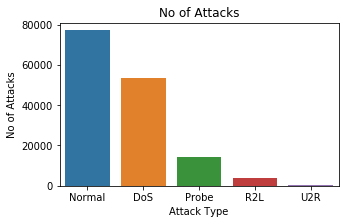

In [16]:
plt.figure(figsize=(5,3))
ax = sns.barplot(x="Attack Type", y="No of Attacks", data=attacks)
plt.title("No of Attacks")
plt.show()


### From the above graph, it can be seen that the Dos attacks are more frequent than any other types of attacks

In [17]:
grouped_data = df.groupby(['attack_class']).labels.value_counts()

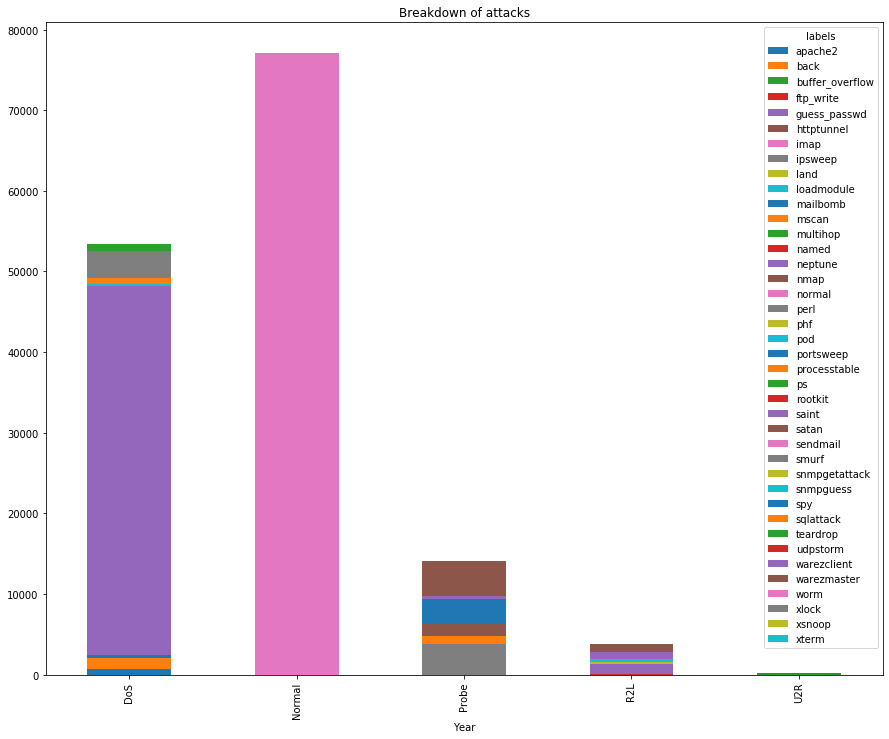

In [18]:

# colors = ['red', 'green', "pink", "lime", "cyan", "olive", "gray", "violet", "orange", "purple", "yellow","peru","blue"]
grouped_data.unstack().plot(kind='bar', stacked=True ,figsize=(15, 12))
plt.title('Breakdown of attacks')
plt.xlabel('Year')
plt.show()

Text(0.5, 1.0, 'Attacks and Normal for Protocol type')

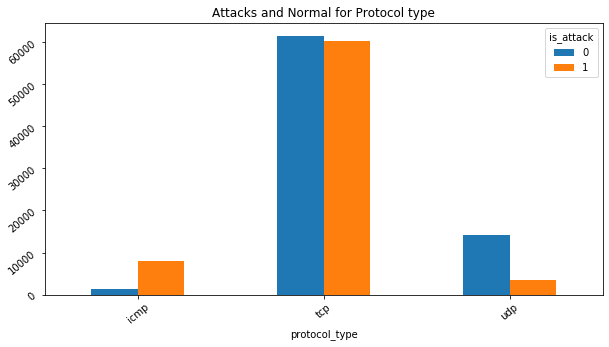

In [19]:
df.groupby('is_attack').protocol_type.value_counts().unstack(0).plot.bar(figsize = (10, 5))
plt.tick_params(rotation=40)
plt.title('Attacks and Normal for Protocol type')

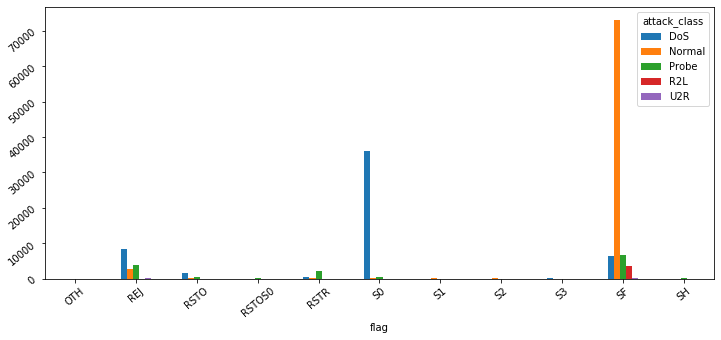

In [20]:
df.groupby('attack_class').flag.value_counts().unstack(0).plot.bar(figsize = (12, 5))
plt.tick_params(rotation=40)